## Data collection distribution

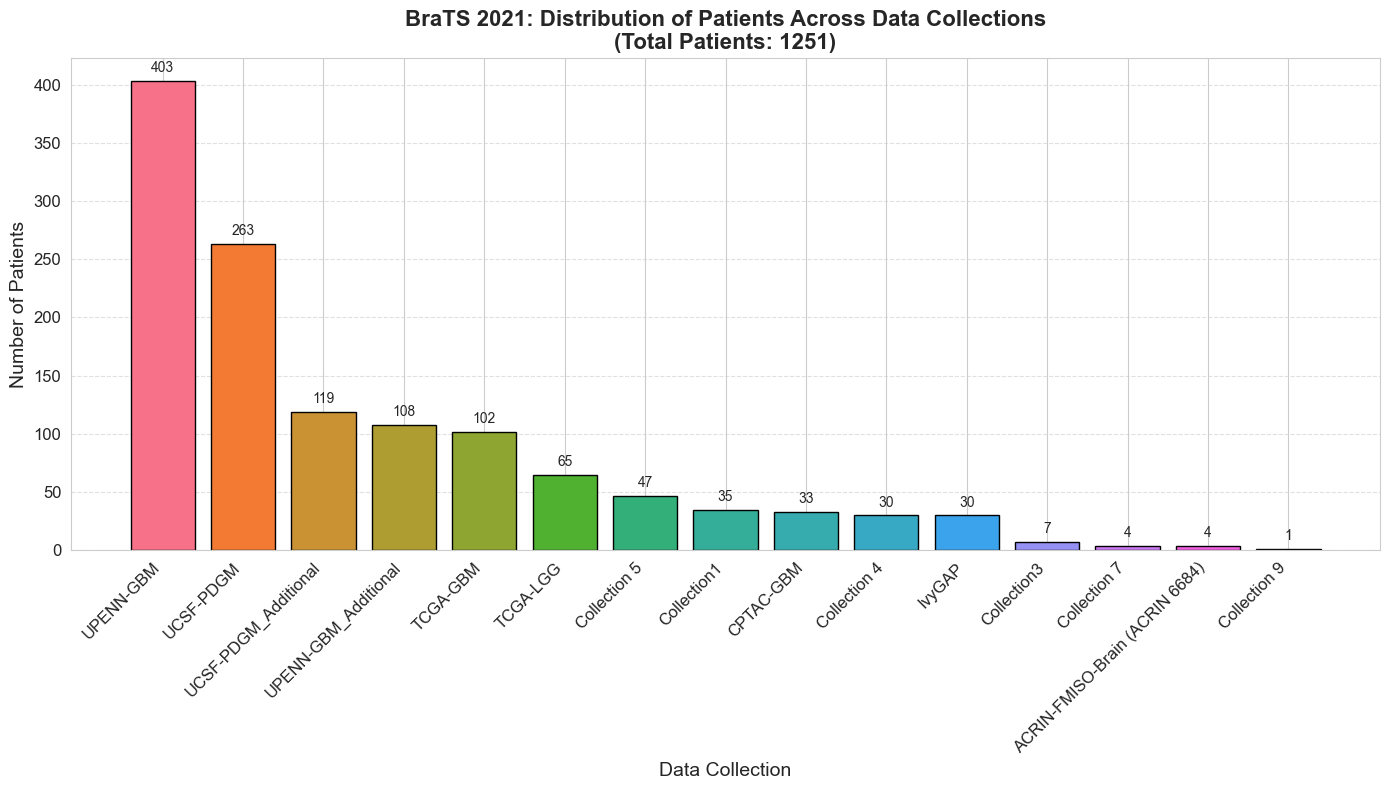

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
file_path = "./BraTS2021_MappingToTCIA.xlsx"
collection_data = pd.read_excel(file_path, sheet_name='TCIA')
collection_data = collection_data[collection_data['Segmentation (Task 1) Cohort'] == 'Training']

# Data preparation
collection_counts = collection_data['Data Collection (as on TCIA+additional)'].value_counts()
total_patients = collection_counts.sum()

# Generate random colors
np.random.seed(42)  # For reproducibility
random_colors = sns.color_palette("husl", len(collection_counts))  # Unique hues

# Plotting
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
bars = plt.bar(
    x=collection_counts.index,
    height=collection_counts.values,
    color=random_colors,
    edgecolor='black'
)

# Annotate bar values
for i, count in enumerate(collection_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)


# Title and labels
plt.title('BraTS 2021: Distribution of Patients Across Data Collections\n(Total Patients: 1251)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Data Collection', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

# Ticks customization
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adjust bar width for better readability
plt.gca().patch.set_alpha(0.8)

# Add lighter grid lines
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [4]:
import os
import nibabel as nib
import numpy as np
import pandas as pd

# Path to the data directory
base_path = r"\\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge\RelabeledTrainingData"


# DataFrame to store results
results = []

# Iterate through each patient's folder
for patient_folder in os.listdir(base_path):
    patient_path = os.path.join(base_path, patient_folder)
    if os.path.isdir(patient_path):  # Ensure it's a directory
        seg_file = os.path.join(patient_path, f"{patient_folder}_seg.nii.gz")
        
        if os.path.exists(seg_file):  # Check if segmentation file exists
            # Load segmentation file
            seg_data = nib.load(seg_file).get_fdata()
            unique_values = np.unique(seg_data)
            print(f"Unique values in {seg_file}: {unique_values}")
            
            # Count voxels for each class
            ncr_count = np.sum(seg_data == 1)  # NCR
            ed_count = np.sum(seg_data == 2)   # ED
            et_count = np.sum(seg_data == 4)   # ET
            
            # Append results to the list
            results.append({
                "Patient": patient_folder,
                "NCR (necrotic core)": ncr_count,
                "ED (edema)": ed_count,
                "ET (enhancing tumor)": et_count
            })

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Save to CSV for reference
df_results.to_csv("class_distribution.csv", index=False)

# Display the first few rows
print(df_results.head())


Unique values in \\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge\RelabeledTrainingData\BraTS2021_00402\BraTS2021_00402_seg.nii.gz: [0. 1. 2. 3.]
Unique values in \\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge\RelabeledTrainingData\BraTS2021_01003\BraTS2021_01003_seg.nii.gz: [0. 1. 2. 3.]
Unique values in \\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge\RelabeledTrainingData\BraTS2021_00757\BraTS2021_00757_seg.nii.gz: [0. 1. 2. 3.]
Unique values in \\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge\RelabeledTrainingData\BraTS2021_01452\BraTS2021_01452_seg.nii.gz: [0. 1. 2. 3.]
Unique values in \\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge\RelabeledTrainingData\BraTS2021_00601\BraTS2021_00601_seg.nii.gz: [0. 1. 2. 3.]
Unique values in \\wsl.localhost\Ubuntu-22.04\home\magata\data\brats2021challenge\RelabeledTrainingData\BraTS2021_00682\BraTS2021_00682_seg.nii.gz: [0. 1. 2. 3.]
Unique values in \\wsl.local

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate counts across all patients
total_counts = df_results[['NCR (necrotic core)', 'ED (edema)', 'ET (enhancing tumor)']].sum()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=total_counts.index, y=total_counts.values, palette="viridis")

# Add annotations
for i, count in enumerate(total_counts.values):
    plt.text(i, count + 5000, str(count), ha='center', va='bottom', fontsize=10)

# Title and labels
plt.title('Aggregate Distribution of NCR, ED, and ET Classes', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Total Voxels', fontsize=14)

plt.tight_layout()
plt.show()
